По сформированным данным необходимо обучить модель для предсказания цены машины. Оцените качество работы созданной сети, определив средний процент ошибки на проверочной выборке. (Для этого потребуется привести предсказанные моделью значения к первоначальному диапазону цен. Это можно сделать с помощью следующего метода:

predict_inverse = y_scaler.inverse_transform(predict).flatten()

где predict - результат предсказания модели).

Затем подсчитайте среднюю ошибку на тестовой выборке, среднюю цену и средний процент ошибки.

# Импорт библио

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

%matplotlib inline

In [ ]:
drive.mount("/content/drive")
fileData = pd.read_csv("/content/drive/MyDrive/Lessons/Lesson 2/cars_new.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fileData.head()

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [ ]:
print(fileData.values.shape)

(70119, 10)


In [ ]:
def getDict(data):
  newDict = {}
  for ii, jj in enumerate(data):
    newDict.update({jj: ii})
  return newDict


def to_ohc(value, data):
  arr = [0] * len(data)
  arr[data[value]] = 1
  return arr

In [ ]:
for ii in fileData:
  print(ii)

mark
model
price
year
mileage
body
kpp
fuel
volume
power


In [ ]:
mark_dict = getDict(set(fileData["mark"]))
model_dict = getDict(set(fileData["model"]))
body_dict = getDict(set(fileData["body"]))
kpp_dict = getDict(set(fileData["kpp"]))
fuel_dict = getDict(set(fileData["fuel"]))

price = np.array(fileData["price"], dtype=np.float)

year = preprocessing.scale(fileData["year"])
meleage = preprocessing.scale(fileData["mileage"])
volume = preprocessing.scale(fileData["volume"])
power = preprocessing.scale(fileData["power"])

# Подготовка данных

In [ ]:
xTrain = list()
yTrain = list()

for _id, car in enumerate(np.array(fileData)):

  yTrain.append(price[_id])

  context = to_ohc(car[0], mark_dict) + \
            to_ohc(car[1], model_dict) + \
            to_ohc(car[5], body_dict) + \
            to_ohc(car[6], kpp_dict) + \
            to_ohc(car[7], fuel_dict) + \
            [year[_id]] + \
            [meleage[_id]] + \
            [volume[_id]] + \
            [power[_id]]

  xTrain.append(context)

xTrain = np.array(xTrain, dtype=np.float)
yTrain = np.array(yTrain, dtype=np.float)

# Создание стандартизатора

In [ ]:
yScaler = preprocessing.StandardScaler()
yTrainScaled = yScaler.fit_transform(yTrain.reshape(-1, 1)).flatten()

In [ ]:
yTrainScaled.shape

(70119,)

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(xTrain,
                                                yTrainScaler,
                                                test_size=0.2)

# Вспомогательные функции

In [ ]:
def createModel():
  model = Sequential()
  model.add(Dropout(0.2, input_shape=xTrain.shape[1:]))
  model.add(Dense(400, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(500, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(500, activation="relu"))
  model.add(Dense(1))

  model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

  return model


In [ ]:
def getMae(history):
  plt.plot(history.history["mae"],
           label="Точность модели на обучающей выборке.")
  plt.plot(history.history["val_mae"],
           label="Точность модели на проверяющей выборке.")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Точность модели")

  plt.legend()
  plt.show()

def getLoss(history):
  plt.plot(history.history["loss"],
           label="Ошибка на обучающей выборке.")
  plt.plot(history.history["val_loss"],
           label="Ошибка на проверочной выборке")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Ошибка модели")

  plt.legend()
  plt.show()

# Настройка модели



## Создание констант

In [ ]:
epochs = 50
batch = 64

Epoch 1/50
789/789 [==============================] - 20s 24ms/step - loss: 0.9820 - mae: 0.5562 - val_loss: 0.9033 - val_mae: 0.5388
Epoch 2/50
789/789 [==============================] - 19s 24ms/step - loss: 0.9808 - mae: 0.5545 - val_loss: 0.9009 - val_mae: 0.5629
Epoch 3/50
789/789 [==============================] - 19s 24ms/step - loss: 0.9800 - mae: 0.5557 - val_loss: 0.8996 - val_mae: 0.5547
Epoch 4/50
789/789 [==============================] - 19s 24ms/step - loss: 0.9779 - mae: 0.5543 - val_loss: 0.9025 - val_mae: 0.5539
Epoch 5/50
789/789 [==============================] - 19s 24ms/step - loss: 0.9739 - mae: 0.5523 - val_loss: 0.9201 - val_mae: 0.5629
Epoch 6/50
789/789 [==============================] - 19s 24ms/step - loss: 0.9709 - mae: 0.5520 - val_loss: 0.9172 - val_mae: 0.5458
Epoch 7/50
789/789 [==============================] - 19s 24ms/step - loss: 0.9685 - mae: 0.5510 - val_loss: 0.9073 - val_mae: 0.5506
Epoch 8/50
789/789 [==============================] - 19s 24ms

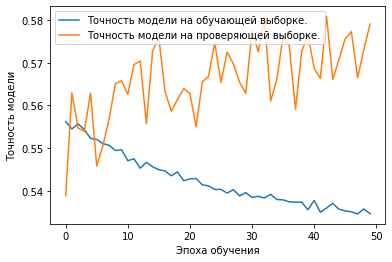

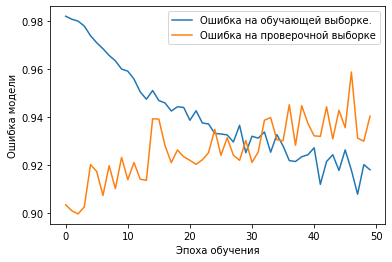

In [ ]:
model = createModel()

history = model.fit(xTrain,
          yTrainScaled,
          epochs=epochs,
          batch_size=batch,
          validation_split=0.1,
          )
getMae(history)
getLoss(history)
predict = model.predict(xTest)

In [ ]:
predict_inverse = yScaler.inverse_transform(predict).flatten()

yTestNorm = yScaler.inverse_transform(yTest.reshape(-1, 1)).flatten()

# Подсчет средней ошибки

In [ ]:

mean_procent = 0
mean_price = 0
for ii in range(len(yTestNorm)):
  mean_price += abs(predict_inverse[ii] - yTestNorm[ii])
  mean_procent += (predict_inverse[ii] - yTestNorm[ii]) / yTestNorm[ii]
ii += 1
mean_price /= ii
mean_procent /= ii

print(f"Средняя ошибка цены: {round(mean_price, 2)}")
print(f"Средн процент ошибки: {round(mean_procent * 100, 4)}%")

Средняя ошибка цены: 360175.09
Средняя процент ошибки: 139.2472%
